In [1]:
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import svm

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.metrics import classification_report,plot_confusion_matrix,plot_roc_curve

In [2]:
import numpy as np
import pandas as pd
from time import time
import pickle

In [3]:
np.random.seed(0)

import warnings
warnings.filterwarnings("ignore")

. . .
##### READ DATA

In [52]:
D = pd.read_csv('papers_learn.csv', header=None)

In [53]:
D.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000,0.632,0.0,7.0,1.000,0.821,0.0,7.0,9.0,9.0,2.0,2.0,0.5,1
1,1.000,0.364,0.0,13.0,1.000,0.678,0.0,13.0,8.0,8.0,2.0,2.0,0.5,1
2,0.923,0.615,1.0,5.0,0.949,0.815,1.0,5.0,13.0,13.0,5.0,5.0,0.5,1
3,1.000,1.000,0.0,0.0,1.000,1.000,0.0,0.0,7.0,7.0,2.0,2.0,0.5,1
4,0.833,0.100,1.0,13.0,0.889,0.413,1.0,13.0,6.0,6.0,2.0,2.0,0.5,0


In [54]:
y = D[13]

. . .
##### CLEAN DATA

In [55]:
X = D.drop(columns=[6,7,8,9,10,11,12,13])

In [56]:
X.shape

(369, 6)

In [57]:
X.head()

,0,1,2,3,4,5
0,1.000,0.632,0.0,7.0,1.000,0.821
1,1.000,0.364,0.0,13.0,1.000,0.678
2,0.923,0.615,1.0,5.0,0.949,0.815
3,1.000,1.000,0.0,0.0,1.000,1.000
4,0.833,0.100,1.0,13.0,0.889,0.413


In [58]:
# Scale
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #, random_state=20)

In [60]:
print(y_train.values)

[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0]


In [61]:
print(y_test.values)

[1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1
 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0]


In [62]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear', probability=True)

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict_proba(X_test)

In [63]:
y_pred[:,1]

array([9.97292551e-01, 2.78630059e-05, 2.66863763e-01, 9.97292551e-01,
       9.97292551e-01, 9.52179069e-01, 2.86857677e-01, 9.97292551e-01,
       9.97292551e-01, 9.59745950e-01, 9.12535814e-01, 9.97292551e-01,
       4.72817068e-01, 8.59454508e-01, 1.40113206e-01, 9.67213813e-01,
       9.32835845e-01, 9.32842570e-01, 8.59454508e-01, 9.95966359e-01,
       9.97292551e-01, 2.86511444e-01, 9.32842570e-01, 9.97292551e-01,
       9.97292551e-01, 3.89146755e-01, 9.97292551e-01, 3.74444206e-01,
       9.97292551e-01, 9.32842570e-01, 9.16949073e-01, 2.33079110e-01,
       9.95795513e-01, 1.08167539e-01, 1.26855723e-01, 9.51429580e-01,
       6.52223556e-01, 9.32842570e-01, 4.72788722e-01, 2.78600120e-05,
       9.97292551e-01, 9.97292551e-01, 8.96033374e-01, 2.33091675e-01,
       2.02406034e-01, 9.78340685e-01, 9.32842570e-01, 8.59454508e-01,
       9.97292551e-01, 1.54529986e-01, 9.97292551e-01, 9.97292551e-01,
       8.87643788e-02, 1.22274148e-01, 9.97292551e-01, 8.22217198e-01,
      

In [64]:
d = y_test - y_pred[:,1]

(array([ 4.,  0.,  4.,  9., 12., 74.,  6.,  1.,  0.,  1.]),
 array([-0.89603337, -0.72973795, -0.56344252, -0.39714709, -0.23085167,
        -0.06455624,  0.10173918,  0.26803461,  0.43433004,  0.60062546,
         0.76692089]),
 <BarContainer object of 10 artists>)

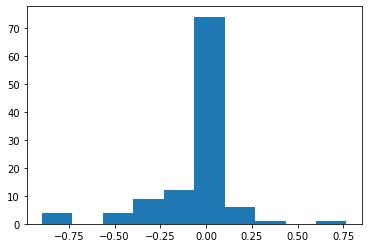

In [65]:
plt.hist(d)

(array([ 8., 10.,  7.,  4.,  3.,  1.,  1.,  1.,  9., 67.]),
 array([1.16801130e-05, 9.97397672e-02, 1.99467854e-01, 2.99195941e-01,
        3.98924028e-01, 4.98652115e-01, 5.98380202e-01, 6.98108290e-01,
        7.97836377e-01, 8.97564464e-01, 9.97292551e-01]),
 <BarContainer object of 10 artists>)

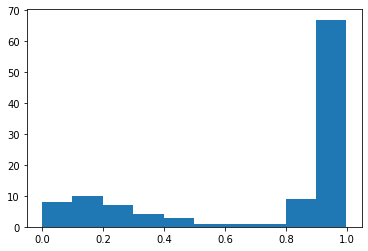

In [66]:
plt.hist(y_pred[:,1])

In [67]:
y_predL = y_pred[:,0]*[0]
y_predL[y_pred[:,1]>0.5] = 1

In [68]:
y_predL = y_predL.astype(int)

In [69]:
y_predL

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0])

In [70]:
y_test.values

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0])

In [71]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predL))

Accuracy: 0.9459459459459459


In [72]:
print("F1-score:",metrics.f1_score(y_test, y_predL))

F1-score: 0.961038961038961


In [73]:
print("AUC:",metrics.roc_auc_score(y_test, y_predL))

AUC: 0.923888888888889


In [74]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_predL)) 

# Model Recall: what percentage of positive tuples are labelled as such? 
print("Recall:",metrics.recall_score(y_test, y_predL))

Precision: 0.9367088607594937
Recall: 0.9866666666666667


In [75]:
scores = np.arange(0, 1, 0.1)

In [76]:
y_pred[:20,1]

array([9.97292551e-01, 2.78630059e-05, 2.66863763e-01, 9.97292551e-01,
       9.97292551e-01, 9.52179069e-01, 2.86857677e-01, 9.97292551e-01,
       9.97292551e-01, 9.59745950e-01, 9.12535814e-01, 9.97292551e-01,
       4.72817068e-01, 8.59454508e-01, 1.40113206e-01, 9.67213813e-01,
       9.32835845e-01, 9.32842570e-01, 8.59454508e-01, 9.95966359e-01])

In [77]:
print(y_test[:20].values)

[1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1]


In [78]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred[:,1])

In [79]:
thresholds

array([1.99729255e+00, 9.97292551e-01, 9.34395097e-01, 9.32842570e-01,
       9.06407298e-01, 8.96033374e-01, 8.59454508e-01, 8.22217198e-01,
       8.14866281e-01, 8.12386704e-01, 6.52223556e-01, 2.33091675e-01,
       2.33079110e-01, 1.16801130e-05])

In [80]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02777778, 0.02777778, 0.08333333, 0.08333333, 0.11111111,
       0.11111111, 0.47222222, 0.47222222, 1.        ])

In [81]:
tpr

array([0.        , 0.45333333, 0.62666667, 0.82666667, 0.89333333,
       0.89333333, 0.94666667, 0.94666667, 0.96      , 0.96      ,
       0.98666667, 0.98666667, 1.        , 1.        ])

Text(0, 0.5, 'TPR')

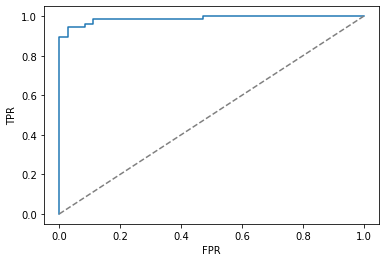

In [82]:
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle='--', color='grey')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [83]:
confusion_matrix(y_test, y_predL)

array([[31,  5],
       [ 1, 74]])

##### SAVE THE MODEL

using pickle

In [84]:
with open('SVM_model.pk', 'wb') as f:
    pickle.dump(clf, f)

In [90]:
tst = np.array([[0., 0., 1., 1., 0., 0.]])
clf2.predict(tst)

array([1])

In [86]:
with open('SVM_model.pk', 'rb') as f:
    clf = pickle.load(f) 

In [87]:
clf2.predict(tst)

array([1])

using joblib (recommended)

In [38]:
from joblib import dump, load

In [127]:
dump([clf, scaler], 'SVM_model.joblib')

['SVM_model.joblib']

In [128]:
clf2, scaler2 = load('SVM_model.joblib')

In [47]:
tst = np.array([[0., 0., 0., 0., 1., 1.]])

In [49]:
clf2.predict(tst)

array([1])

In [908]:
X_test[0,:]

array([-1.12366143, -0.30227563, -1.23031535])

In [44]:
for x, y in zip(X_test[:12], y_test[:12]):
    print(clf.predict(x.reshape(1,-1)), y)

[1] 1
[1] 1
[0] 0
[1] 1
[1] 1
[0] 0
[0] 0
[0] 0
[0] 1
[1] 1
[1] 1
[1] 1


In [103]:
x = X_test[2]
print(x)

[ 0.28552165 -1.02304127 -0.21489467  0.04910196  0.25683987 -0.95181634]


In [106]:
y = y_test.iloc[2]
print(y)

0


In [108]:
clf.predict(x.reshape(1, -1))

array([0])

In [110]:
x = np.array([[ 0.2, 0.5, 11., 1., 0.47222222, 0.66666667]])

In [111]:
x

array([[ 0.2       ,  0.5       , 11.        ,  1.        ,  0.47222222,
         0.66666667]])

In [112]:
clf.predict(x)

array([1])

In [120]:
x = np.array([[0.2222222222222222, 0.2, 10, 7, 0.5, 0.5416666666666666]])
x = np.array([[1., 1., 10, 7, 0.5, 0.]])

In [121]:
clf.predict_proba(x)

array([[0.00572302, 0.99427698]])

In [126]:
for x in X_test:
    print(x)
    print(clf.predict(x.reshape(1, -1))[0])
    print()

[ 0.28552165  1.09702741 -0.21489467 -0.93028316  0.25683987  0.8753134 ]
1

[ 0.28552165 -2.23641391 -0.21489467  0.29394825  0.25683987 -3.45437793]
0

[ 0.28552165 -1.02304127 -0.21489467  0.04910196  0.25683987 -0.95181634]
0

[ 0.28552165  1.09702741 -0.21489467 -0.93028316  0.25683987  0.8753134 ]
1

[ 0.28552165  1.09702741 -0.21489467 -0.93028316  0.25683987  0.8753134 ]
1

[ 0.28552165 -0.11634523 -0.21489467  1.02848709  0.25683987  0.10462834]
1

[-1.05804966 -1.02304127  0.63775194  1.76302594 -0.92676453 -0.80027715]
0

[ 0.28552165  1.09702741 -0.21489467 -0.93028316  0.25683987  0.8753134 ]
1

[ 0.28552165  1.09702741 -0.21489467 -0.93028316  0.25683987  0.8753134 ]
1

[ 0.28552165 -0.01300855 -0.21489467  0.78364081  0.25683987  0.15225495]
1

[-3.29375231  0.43033914  1.49039855 -0.68543688 -2.90894539  0.29946445]
1

[ 0.28552165  1.09702741 -0.21489467 -0.93028316  0.25683987  0.8753134 ]
1

[ 0.28552165 -0.90303738 -0.21489467  0.78364081  0.25683987 -0.71368332]
0
